In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# three_layer_neuron_network.py

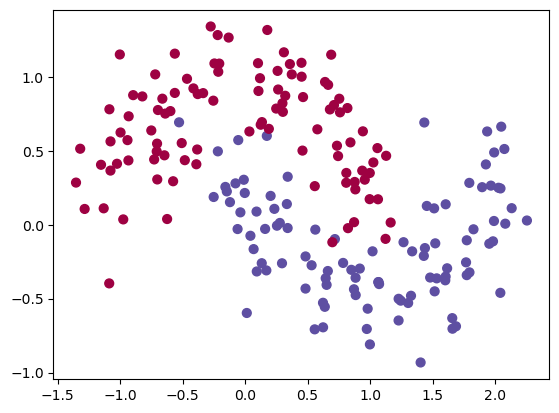

Loss after iteration 0: 0.002382
Loss after iteration 1000: 0.003487
Loss after iteration 2000: 0.003772
Loss after iteration 3000: 0.003871
Loss after iteration 4000: 0.003916
Loss after iteration 5000: 0.003941
Loss after iteration 6000: 0.003954
Loss after iteration 7000: 0.003962
Loss after iteration 8000: 0.003967
Loss after iteration 9000: 0.003969
Loss after iteration 10000: 0.003971
Loss after iteration 11000: 0.003972
Loss after iteration 12000: 0.003972
Loss after iteration 13000: 0.003972
Loss after iteration 14000: 0.003972
Loss after iteration 15000: 0.003972
Loss after iteration 16000: 0.003972
Loss after iteration 17000: 0.003972
Loss after iteration 18000: 0.003972
Loss after iteration 19000: 0.003972


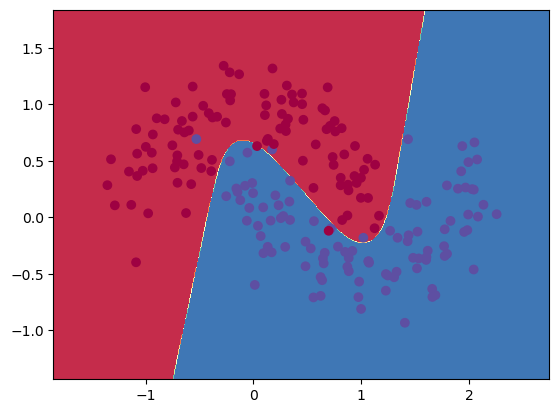

In [2]:
__author__ = 'kai_malcolm'
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder


def generate_data():
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: tanh, sigmoid, or relu
        :return: activations
        '''

        # YOU IMPLMENT YOUR actFun HERE
        if type.lower()=='tanh':
            z_out = np.tanh(z)
        elif type.lower()=='sigmoid':
            z_out = 1 / (1 + np.exp(-z))
        elif type.lower()=='relu':
            z_out = np.maximum(0, z)
        elif type.lower() == 'softmax': # Add softmax since this is what we are doing when we set self.probs
            exp_scores = np.exp(z)
            return exp_scores / exp_scores.sum(axis=1, keepdims=True)
        else:
            raise ValueError('That activation function type is not defined.')

        return z_out

    def diff_actFun(self, z, type):
        '''
        diff_actFun computes the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        if type.lower()=='tanh':
            z_out_prime = 1 - np.power(np.tanh(z), 2)
        elif type.lower()=='sigmoid':
            z_out_prime = self.actFun(z, type)*(1 - self.actFun(z, type))
        elif type.lower()=='relu':
            z_out_prime = (z > 0).astype('float')
        elif type.lower() == 'softmax':
            return z
        else:
            raise ValueError('That activation function type is not defined.')

        return z_out_prime

    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE
        self.z1 = X@self.W1 + self.b1
        self.a1 = actFun(self.z1)
        self.z2 = self.a1@self.W2 + self.b2
        # No a2? Ig implicitly the below is analogous to softmax?
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return None

    def calculate_loss(self, X, y):
        '''
        calculate_loss computes the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        y_onehot = OneHotEncoder(sparse_output=False).fit_transform(y.reshape((-1, 1)))
        data_loss = (-1/num_examples) * np.sum(np.log(self.probs) * y_onehot)

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs
        delta3[range(num_examples), y] -= 1

        # dW2 = dL/dW2
        dW2 = np.dot(self.a1.T, delta3)
        # db2 = dL/db2
        db2 = np.sum(delta3, axis=0, keepdims=True)
        # Need to find delta2 for earlier layer
        diff = self.diff_actFun(self.z1, type=self.actFun_type) # Should z1 be a1?
        delta2 = np.dot(delta3, self.W2.T) * diff
        # dW1 = dL/dW1
        dW1 = np.dot(X.T, delta2)
        # db1 = dL/db1
        db1 = np.sum(delta2, axis=0) #, keepdims=False

        return dW1, dW2, db1, db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)

def main():
    # # generate and visualize Make-Moons dataset
    X, y = generate_data()
    #####################################################
    ### INCLUDE THIS FIGURE IN THE REPORT ###
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    # tanh, sigmoid, relu
    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='tanh')
    model.fit_model(X,y)
    model.visualize_decision_boundary(X,y)

if __name__ == "__main__":
    main()

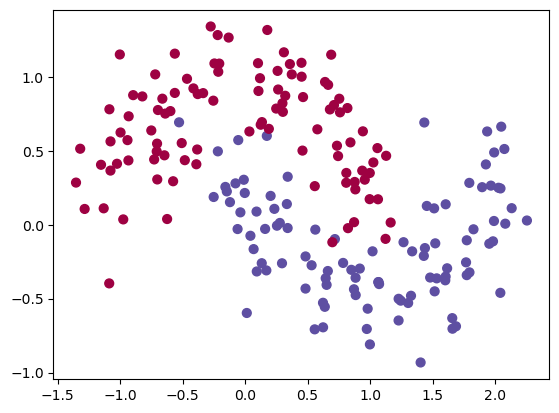

In [3]:
# # generate and visualize Make-Moons dataset
X, y = generate_data()
#####################################################
### INCLUDE THIS FIGURE IN THE REPORT ###
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

Loss after iteration 0: 0.002382
Loss after iteration 1000: 0.003487
Loss after iteration 2000: 0.003772
Loss after iteration 3000: 0.003871
Loss after iteration 4000: 0.003916
Loss after iteration 5000: 0.003941
Loss after iteration 6000: 0.003954
Loss after iteration 7000: 0.003962
Loss after iteration 8000: 0.003967
Loss after iteration 9000: 0.003969
Loss after iteration 10000: 0.003971
Loss after iteration 11000: 0.003972
Loss after iteration 12000: 0.003972
Loss after iteration 13000: 0.003972
Loss after iteration 14000: 0.003972
Loss after iteration 15000: 0.003972
Loss after iteration 16000: 0.003972
Loss after iteration 17000: 0.003972
Loss after iteration 18000: 0.003972
Loss after iteration 19000: 0.003972


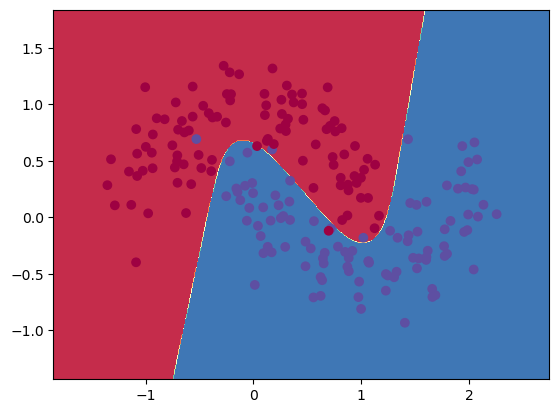

In [4]:
# tanh, sigmoid, relu
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

Train the network using different activation functions (Tanh, Sigmoid and ReLU). Describe and explain the differences that you observe. Include the figures generated in your report.

tanh

Loss after iteration 0: 0.002382
Loss after iteration 1000: 0.003487
Loss after iteration 2000: 0.003772
Loss after iteration 3000: 0.003871
Loss after iteration 4000: 0.003916
Loss after iteration 5000: 0.003941
Loss after iteration 6000: 0.003954
Loss after iteration 7000: 0.003962
Loss after iteration 8000: 0.003967
Loss after iteration 9000: 0.003969
Loss after iteration 10000: 0.003971
Loss after iteration 11000: 0.003972
Loss after iteration 12000: 0.003972
Loss after iteration 13000: 0.003972
Loss after iteration 14000: 0.003972
Loss after iteration 15000: 0.003972
Loss after iteration 16000: 0.003972
Loss after iteration 17000: 0.003972
Loss after iteration 18000: 0.003972
Loss after iteration 19000: 0.003972


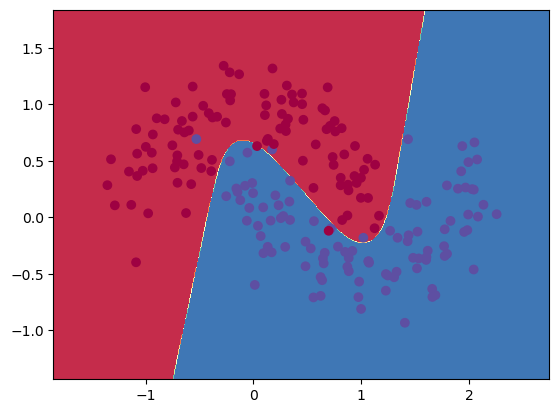

In [5]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

sigmoid

Loss after iteration 0: 0.003348
Loss after iteration 1000: 0.008907
Loss after iteration 2000: 0.010852
Loss after iteration 3000: 0.011388
Loss after iteration 4000: 0.011649
Loss after iteration 5000: 0.011794
Loss after iteration 6000: 0.011876
Loss after iteration 7000: 0.011923
Loss after iteration 8000: 0.011950
Loss after iteration 9000: 0.011966
Loss after iteration 10000: 0.011975
Loss after iteration 11000: 0.011979
Loss after iteration 12000: 0.011982
Loss after iteration 13000: 0.011983
Loss after iteration 14000: 0.011984
Loss after iteration 15000: 0.011984
Loss after iteration 16000: 0.011984
Loss after iteration 17000: 0.011984
Loss after iteration 18000: 0.011984
Loss after iteration 19000: 0.011983


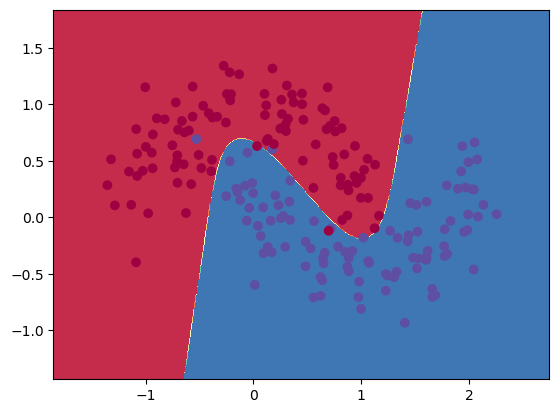

In [6]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='sigmoid')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

relu

Loss after iteration 0: 0.003022
Loss after iteration 1000: 0.003473
Loss after iteration 2000: 0.003937
Loss after iteration 3000: 0.004095
Loss after iteration 4000: 0.004160
Loss after iteration 5000: 0.004176
Loss after iteration 6000: 0.004179
Loss after iteration 7000: 0.004177
Loss after iteration 8000: 0.004175
Loss after iteration 9000: 0.004172
Loss after iteration 10000: 0.004171
Loss after iteration 11000: 0.004170
Loss after iteration 12000: 0.004169
Loss after iteration 13000: 0.004168
Loss after iteration 14000: 0.004169
Loss after iteration 15000: 0.004167
Loss after iteration 16000: 0.004169
Loss after iteration 17000: 0.004167
Loss after iteration 18000: 0.004169
Loss after iteration 19000: 0.004169


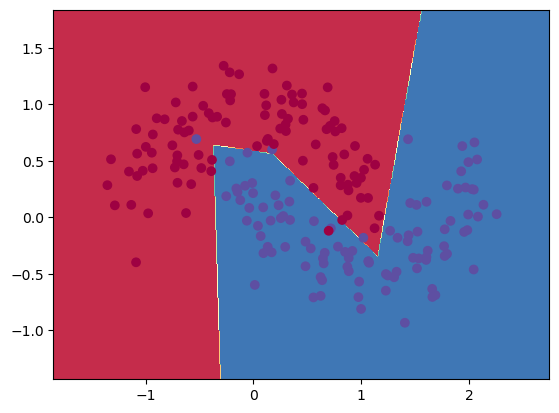

In [7]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='relu')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

> __Conclusions:__ 

Increase the number of hidden units (nn hidden dim) and retrain the network using Tanh as the activation function. Describe and explain the differences that you observe. Include the figures generated in your report.


Loss after iteration 0: 0.003540
Loss after iteration 1000: 0.005674
Loss after iteration 2000: 0.008384
Loss after iteration 3000: 0.010099
Loss after iteration 4000: 0.011278
Loss after iteration 5000: 0.012148
Loss after iteration 6000: 0.012811
Loss after iteration 7000: 0.013321
Loss after iteration 8000: 0.013714
Loss after iteration 9000: 0.014024
Loss after iteration 10000: 0.014253
Loss after iteration 11000: 0.014416
Loss after iteration 12000: 0.014535
Loss after iteration 13000: 0.014623
Loss after iteration 14000: 0.014689
Loss after iteration 15000: 0.014739
Loss after iteration 16000: 0.014778
Loss after iteration 17000: 0.014808
Loss after iteration 18000: 0.014832
Loss after iteration 19000: 0.014852


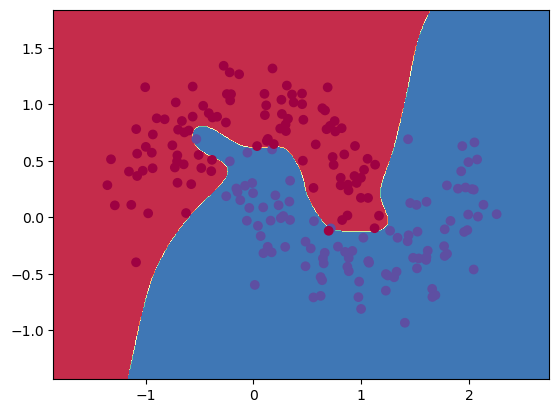

In [8]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=10 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

Loss after iteration 0: 0.019849
Loss after iteration 1000: 0.006528
Loss after iteration 2000: 0.008100
Loss after iteration 3000: 0.009188
Loss after iteration 4000: 0.010293
Loss after iteration 5000: 0.011479
Loss after iteration 6000: 0.012538
Loss after iteration 7000: 0.013383
Loss after iteration 8000: 0.014027
Loss after iteration 9000: 0.014508
Loss after iteration 10000: 0.014865
Loss after iteration 11000: 0.015127
Loss after iteration 12000: 0.015317
Loss after iteration 13000: 0.015449
Loss after iteration 14000: 0.015531
Loss after iteration 15000: 0.015568
Loss after iteration 16000: 0.015572
Loss after iteration 17000: 0.015552
Loss after iteration 18000: 0.015518
Loss after iteration 19000: 0.015475


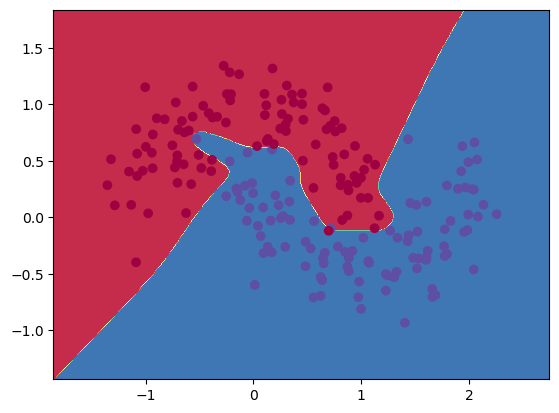

In [9]:
model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=100 , nn_output_dim=2, actFun_type='tanh')
model.fit_model(X,y)
model.visualize_decision_boundary(X,y)

> __Conclusions:__ 

# n_layer_neural_network.py
- We provide you hints below to help you organize and implement the code, but if you have better ideas, please feel free to implement them and ignore our hints. In your report, please tell us why you made the choice(s) you did.


Loss after iteration 0: 0.005135
Accuracy after iteration 0: 0.660000
Loss after iteration 1000: 0.006228
Accuracy after iteration 1000: 0.985000
Loss after iteration 2000: 0.008554
Accuracy after iteration 2000: 0.995000
Loss after iteration 3000: 0.008240
Accuracy after iteration 3000: 1.000000
Loss after iteration 4000: 0.007517
Accuracy after iteration 4000: 1.000000
Loss after iteration 5000: 0.006950
Accuracy after iteration 5000: 1.000000
Loss after iteration 6000: 0.006539
Accuracy after iteration 6000: 1.000000
Loss after iteration 7000: 0.006242
Accuracy after iteration 7000: 1.000000
Loss after iteration 8000: 0.006020
Accuracy after iteration 8000: 1.000000
Loss after iteration 9000: 0.005845
Accuracy after iteration 9000: 1.000000


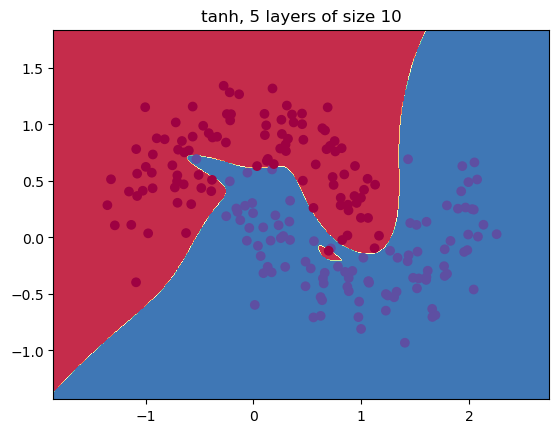

In [10]:
# These are already imported
#import three_layer_neural_network as tlnn
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder

class DeepNeuralNetwork(NeuralNetwork):
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, n_layers, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units (layer size)
        :param nn_output_dim: output dimension
        :param n_layers: number of layers
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.n_layers = n_layers
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        
        self.layers = []
        # Passing in "self" (current neural network obj) so I can access activation funcs and such
        # Set the 1st layer as input_dim x hidden_dim
        self.layers.append(Layer(self, nn_input_dim, nn_hidden_dim, actFun_type))
        # Set the middle layers as hidden_dim x hidden_dim
        for _ in range(n_layers - 3):
            self.layers.append(Layer(self, nn_hidden_dim, nn_hidden_dim, actFun_type))
        # Set the last layer as hidden_dim x output_dim
        self.layers.append(Layer(self, nn_hidden_dim, nn_output_dim, 'softmax'))

    def feedforward(self, X):
        # YOU IMPLEMENT YOUR feedforward HERE
        self.activations = []
        activation = X

        for layer in self.layers:
            layer.feedforward(activation) # Sets layer.a, AKA the resulting activation
            activation = layer.a
            self.activations.append(activation)
        self.probs = activation

        return None

    def calculate_loss(self, X, y):
        num_examples = len(X)
        self.feedforward(X)
        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        y_onehot = OneHotEncoder(sparse_output=False).fit_transform(y.reshape((-1, 1)))
        data_loss = (-1/num_examples) * np.sum(np.log(self.probs) * y_onehot)
        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * np.sum([np.square(layer.W).sum() for layer in self.layers])
        return (1. / num_examples) * data_loss

    def predict(self, X):
        # This is DNN feedfoward:
        self.feedforward(X)
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs.copy()
        delta3[range(num_examples), y] -= 1
        # Use Layer()-wise backprop
        da = self.layers[-1].backprop(da=None, a_previous=self.layers[-2].a, dz=delta3)
        
        # Iterate through [n_layers-3, n_layers-4, ... , 1]
        for i in np.arange(1, self.n_layers-2)[::-1]:
            da = self.layers[i].backprop(da=da, a_previous=self.layers[i-1].a)
            
        self.layers[0].backprop(da, X)
        
        return None

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X)
            # Backpropagation
            self.backprop(X, y)
            
            for layer in self.layers:
                layer.gradient_step(epsilon, self.reg_lambda)

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))
                print("Accuracy after iteration %i: %f" % (i, (self.probs.argmax(axis=1) == y).sum() / len(y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)

class Layer(object):
    def __init__(self, neuralnet_obj, nn_input_dim, nn_output_dim, actFun_type='tanh'):
        self.neuralnet_obj = neuralnet_obj
        self.nn_input_dim = nn_input_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        # Init weight and biases to random matrix and vector of zeros, respectively
        self.W = np.random.randn(self.nn_input_dim, self.nn_output_dim) / np.sqrt(self.nn_input_dim)
        self.b = np.zeros((1, self.nn_output_dim))
        
    # Implement feedforward for a single layer
    def feedforward(self, X):
        self.z = X@self.W + self.b
        self.a = self.neuralnet_obj.actFun(self.z, self.actFun_type)
        #self.z = X.dot(self.W) + self.b
        #self.a = self.dnn_instance.actFun(self.z, self.actFun_type)
        #return self.a
        return None
    
    # Implement backprop for a single layer
    def backprop(self, da, a_previous, dz=None):
        # z is the output (after the activation layer)
        # a is the actual activation
        # W, b are the weights and biases
        if dz is None:
            self.dz = self.neuralnet_obj.diff_actFun(self.z, self.actFun_type) * da
        else:
            self.dz = dz
        self.dW = a_previous.T.dot(self.dz)
        self.db = self.dz.sum(axis=0, keepdims=True)
        da_previous = self.dz.dot(self.W.T)
        return da_previous
                                            
    def gradient_step(self, epsilon, reg_lambda):
        self.dW += reg_lambda * self.W
        self.W -= epsilon * self.dW
        self.b -= epsilon * self.db
        return None

if __name__ == "__main__":
    # generate and visualize Make-Moons dataset
    X, y = generate_data()
    #plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    #plt.show()

    actFun_type = 'tanh' #sigmoid, relu
    hidden_neurons_per_layer = 10
    num_layers = 5

    deep_model_tanh_5_10 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=hidden_neurons_per_layer, nn_output_dim=2, n_layers=num_layers, actFun_type=actFun_type)
    deep_model_tanh_5_10.fit_model(X, y, num_passes=10000)
    plt.title(f'{actFun_type}, {num_layers} layers of size {hidden_neurons_per_layer}') 
    deep_model_tanh_5_10.visualize_decision_boundary(X,y)

Train your network on the Make Moons dataset using different number of layers, different layer sizes, different activation functions and, in general, different network configurations. In your report, include generated images and describe what you observe and what you find interesting (e.g. decision boundary of deep vs shallow neural networks).


different number of layers

different layer sizes

different activation functions

different network configurations
- E.g. all of the above changes combined

> __Conclusion:__ 

Next, train your network on another dataset different from Make Moons. You can choose datasets provided by Scikit-learn (more details here) or any dataset of your interest. Make sure that you have the correct number of input and output nodes. Again, play with different network configurations. In your report, describe the dataset you choose and tell us what you find interesting.

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        n_init="auto",
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

Plotting code adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

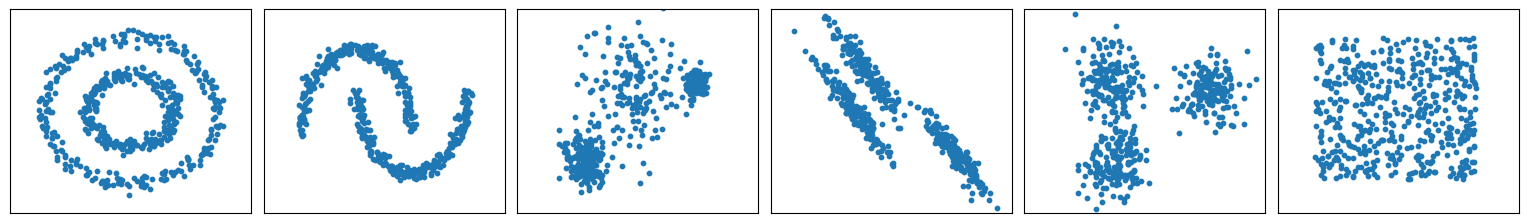

In [33]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    plt.subplot(len(datasets), 8, plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1
plt.show()

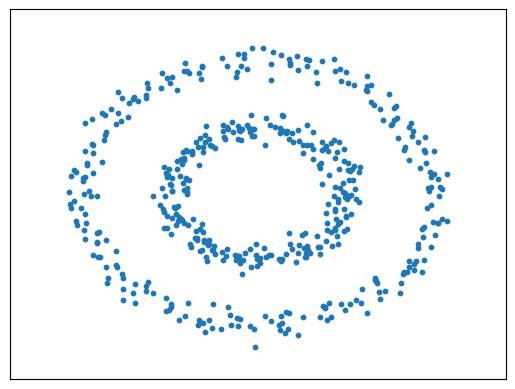

In [37]:
idx = 0
dataset = datasets[idx][0]
algo_params = datasets[idx][1]
# update parameters with dataset-specific values
params = default_base.copy()
params.update(algo_params)
X, y = dataset
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()

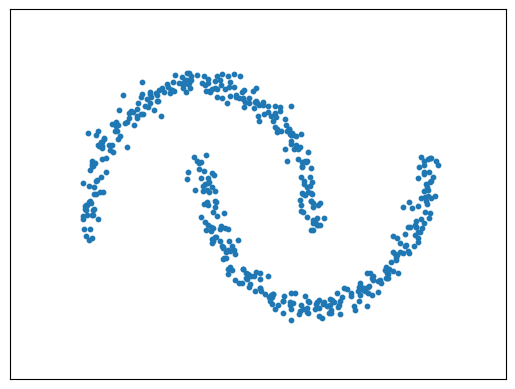

In [38]:
idx = 1
dataset = datasets[idx][0]
algo_params = datasets[idx][1]
# update parameters with dataset-specific values
params = default_base.copy()
params.update(algo_params)
X, y = dataset
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()

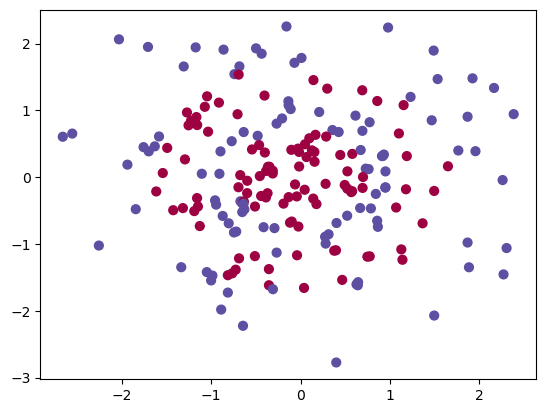

Loss after iteration 0: 0.029376
Accuracy after iteration 0: 0.565000
Loss after iteration 1000: 0.006997
Accuracy after iteration 1000: 0.765000
Loss after iteration 2000: 0.010237
Accuracy after iteration 2000: 0.775000
Loss after iteration 3000: 0.013668
Accuracy after iteration 3000: 0.765000
Loss after iteration 4000: 0.016296
Accuracy after iteration 4000: 0.800000
Loss after iteration 5000: 0.018010
Accuracy after iteration 5000: 0.800000
Loss after iteration 6000: 0.021895
Accuracy after iteration 6000: 0.810000
Loss after iteration 7000: 0.025935
Accuracy after iteration 7000: 0.860000
Loss after iteration 8000: 0.030817
Accuracy after iteration 8000: 0.845000
Loss after iteration 9000: 0.033464
Accuracy after iteration 9000: 0.880000
Loss after iteration 10000: 0.035723
Accuracy after iteration 10000: 0.855000


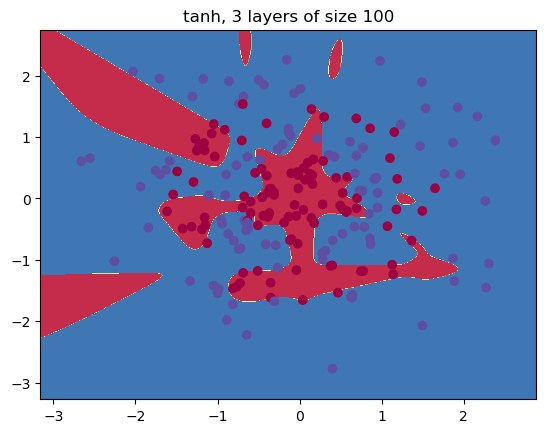

In [11]:
if __name__ == "__main__":
    X, y = datasets.make_gaussian_quantiles(n_samples=200, n_classes=4, n_features=2, random_state=0)
    y = y % 2
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    actFun_type = 'tanh' 
    nn_hidden_dim = 100
    n_layers = 3
    model2 = DeepNeuralNetwork(nn_input_dim=2, nn_hidden_dim=nn_hidden_dim, nn_output_dim=2, n_layers=n_layers, actFun_type=actFun_type)
    model2.fit_model(X,y, num_passes=10000)
    plt.title(f'{actFun_type}, {n_layers} layers of size {nn_hidden_dim}') 
    model2.visualize_decision_boundary(X,y)